In [1]:
import pandas as pd 
import nltk.corpus as corp
import matplotlib.pyplot as plt
import numpy as np
import folium as foo
import string
from collections import Counter
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from textblob import TextBlob

In [2]:
df = pd.read_csv('TrumpData.csv')

In [7]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,full_text,is_retweet,place_cord,place_name,result_type,retweet_count,screen_name,tweet_created,tweet_id,user_id,sentimental_score,sentiment_status,subjectivity,latitude,longitude
0,0,0,Cornered rat,0,"[115.421372, 39.43277]",Beijing,recent,0,peterkalksma,Mon Feb 19 06:10:46 +0000 2018,9.650000e+17,1.504561e+07,0.000000,neu,0.00,39.905963,116.391248
1,1,1,Russian meddling had no effect except for help...,0,"[121.164993, 43.42833]",Heilongjiang,recent,0,MRW_real_one,Mon Feb 19 05:33:21 +0000 2018,9.650000e+17,8.410000e+17,-0.250000,neg,0.50,48.000005,127.999992
2,2,2,you fking psychopath Thank God amp that you re...,0,"[117.998322, 27.14303]",Zhejiang,recent,0,1st04Bravo,Sun Feb 18 16:44:25 +0000 2018,9.650000e+17,2.563797e+09,0.000000,neu,0.00,29.000000,120.000000
3,3,3,you fking psychopath Thank God amp for beating...,0,"[117.998322, 27.14303]",Zhejiang,recent,0,1st04Bravo,Sun Feb 18 16:41:22 +0000 2018,9.650000e+17,2.563797e+09,0.000000,neu,0.00,29.000000,120.000000
4,4,4,I m sorry but shouldn t your focus be on matte...,0,"[97.387161, 26.033886]",Sichuan,recent,0,Douglas_Hook,Sun Feb 18 15:25:21 +0000 2018,9.650000e+17,8.756158e+07,-0.466667,neg,1.00,30.500000,102.500000
5,5,5,Lol should I tell him https t co LFXftJOlKS,0,"[114.875809, 29.407772]",Anhui,recent,0,advocatemnyama,Sun Feb 18 13:57:21 +0000 2018,9.650000e+17,1.408041e+08,0.800000,very pos,0.70,32.000000,117.000000
6,6,6,Time,0,"[115.421372, 39.43277]",Beijing,recent,0,peterkalksma,Sun Feb 18 13:47:06 +0000 2018,9.650000e+17,1.504561e+07,0.000000,neu,0.00,39.905963,116.391248
7,7,7,yeah why was it definitely from Russia why do ...,0,"[117.998322, 27.14303]",Zhejiang,recent,0,bayadere2016,Sun Feb 18 12:41:16 +0000 2018,9.650000e+17,7.460000e+17,0.000000,neu,0.25,29.000000,120.000000
8,8,8,Almost two years later the Yankees are still t...,0,"[108.786652, 24.639717]",Hunan,recent,0,XhuangZhu,Sun Feb 18 08:44:52 +0000 2018,9.650000e+17,2.167820e+09,0.000000,neu,0.00,27.999588,112.009538
9,9,9,I can t believe this guy https t co SC7MDBO9Jg,0,"[115.421372, 39.43277]",Beijing,recent,0,zhousaid,Sun Feb 18 07:54:26 +0000 2018,9.650000e+17,6.724503e+07,0.000000,neu,0.00,39.905963,116.391248


In [3]:
stopword = corp.stopwords.words('english') + ['rt', 'https', 'co', 'u', 'go']
def filter_text(text):
    text = text.lower()
    filteredList = []
    global stopword
    textList = text.split()
    for i in textList:
        if not i in stopword:
            filteredList.append(i)
    return ' '.join(filteredList)

In [4]:
afinn = dict(map(lambda (k,v): (k,int(v)), 
                     [ line.split('\t') for line in open("AFINN-111.txt") ]))

In [5]:
x = []
y = []
z = []
completeText = []
for text in df['full_text']:
    text = filter_text(text)
    tx = TextBlob(text)
    completeText.extend(tx.words)
    val = tx.sentiment.polarity    
    subject = tx.sentiment.subjectivity
    if val <= -0.5:
        valText = 'very neg'
    elif val > -0.5 and val < 0:
        valText = 'neg'
    elif val == 0:
        valText = 'neu'
    elif val > 0 and val < 0.5:
        valText = 'pos'
    elif val >= 0.5:
        valText = 'very pos'
    x.append(val)
    y.append(valText)
    z.append(subject)

In [6]:
df['sentimental_score'] = x
df['sentiment_status'] = y
df['subjectivity'] = z

In [30]:
TextCounter = Counter(completeText)
TextCounter.most_common(30)

[('president', 353),
 ('trump', 308),
 ('like', 238),
 ('people', 227),
 ('amp', 209),
 ('get', 204),
 ('gun', 167),
 ('one', 163),
 ('america', 152),
 ('would', 144),
 ('guns', 129),
 ('know', 127),
 ('us', 125),
 ('think', 124),
 ('man', 119),
 ('right', 115),
 ('time', 113),
 ('country', 111),
 ('good', 109),
 ('make', 108),
 ('world', 103),
 ('stop', 102),
 ('even', 101),
 ('need', 97),
 ('oprah', 92),
 ('see', 89),
 ('great', 89),
 ('obama', 88),
 ('say', 86),
 ('day', 86)]

Text(0.5,1,u'Word Frequency Graph of Tweets from World')

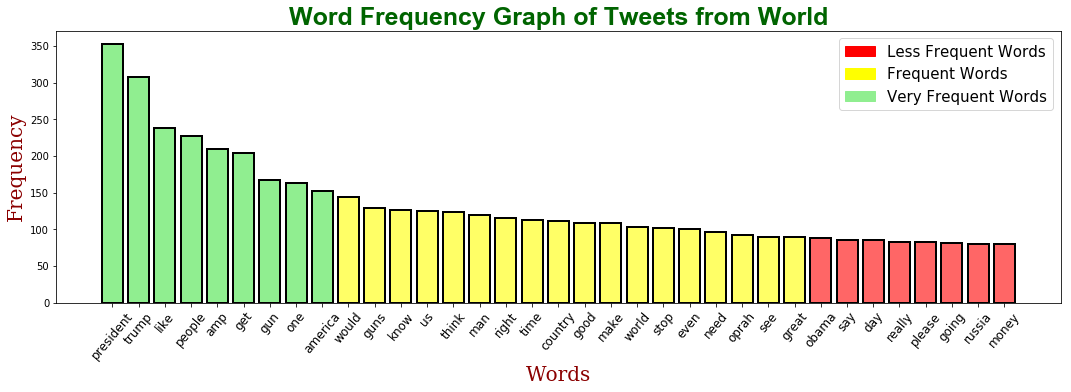

In [9]:
%matplotlib inline
labels, values = zip(*TextCounter.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor([1,0,0,0.6])
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Tweets from World', fontdict = font_title)

# USA Tweets Sentiment on Donald Trump

In [10]:
stateData = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')

In [11]:
stateData = [i.lower() for i in stateData['State']]

In [12]:
USAData = []
for i in range(len(df)):
    if (df.loc[i]['place_name'].lower() in stateData):
        USAData.append(df.iloc[i])
USAData = pd.DataFrame(USAData)

In [13]:
ustext = ''
for i in USAData['full_text']:
    ustext += filter_text(text=i)
usaCounter = Counter(ustext.split(' '))

Text(0.5,1,u'Word Frequency Graph of Tweets from USA')

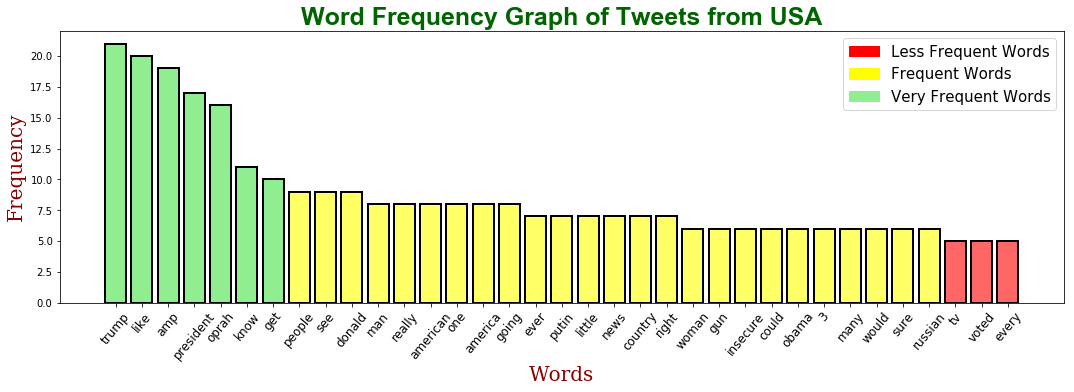

In [14]:
%matplotlib inline
labels, values = zip(*usaCounter.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor([1,0,0,0.6])
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Tweets from USA', fontdict = font_title)

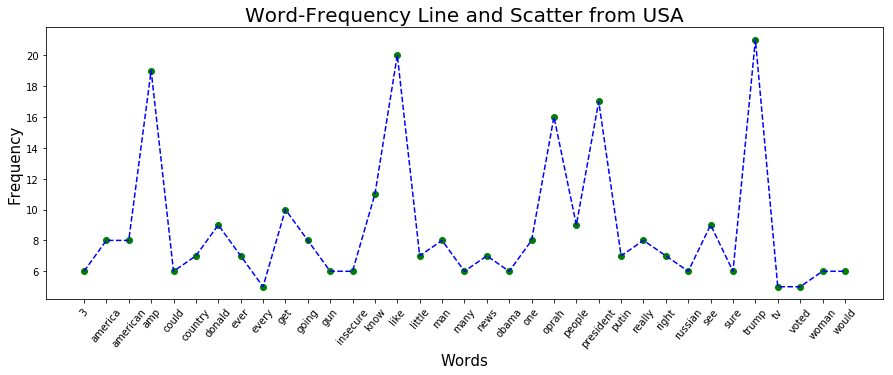

In [15]:
%matplotlib inline
word, count = zip(*sorted(usaCounter.most_common(35)))
plt.figure(figsize =(15,5))
plt.plot(word, count, 'go', word,count, 'b--')
plt.xticks(rotation = 50)
plt.xlabel('Words', fontdict = {'size': 15})
plt.ylabel('Frequency', fontdict = {'size': 15})
plt.title('Word-Frequency Line and Scatter from USA', fontsize = 20)
print

In [16]:
mask1 = df['sentimental_score'] < 0
mask2 = df['sentimental_score'] > 0
posData = USAData[mask2]['sentimental_score']
negData = USAData[mask1]['sentimental_score']

C:\Users\Ritik\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ritik\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


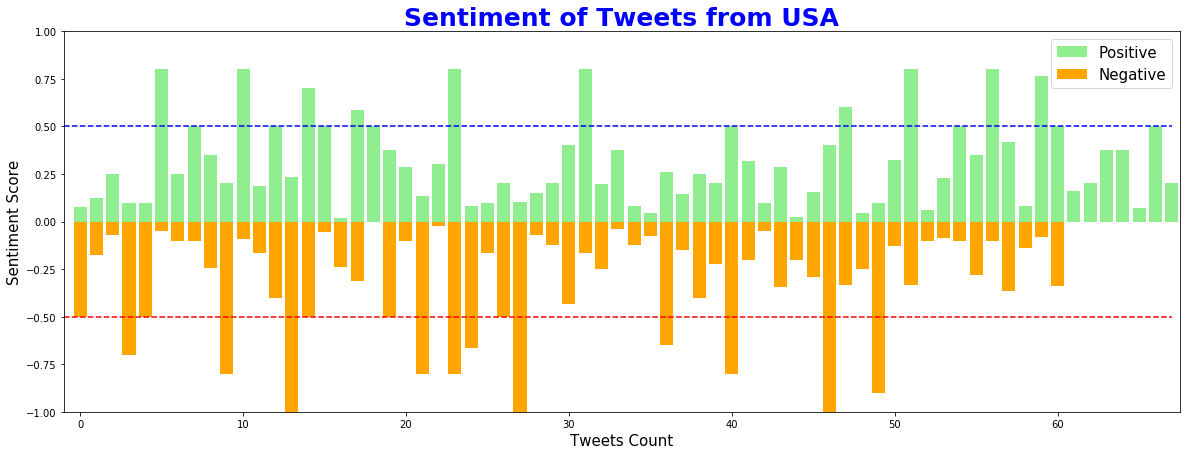

In [17]:
plt.figure(figsize = (20,7))
plt.bar(range(len(posData)), posData, color = 'lightgreen')
plt.bar(range(len(negData)), negData, color = 'orange')
plt.xlabel('Tweets Count', fontsize = 15)
plt.legend(['Positive', 'Negative'], fontsize = 15)
plt.plot(range(-1,len(posData)), [0.5] * (len(posData)+1), 'b--')
plt.plot(range(-1,len(posData)), [-0.5] * (len(posData)+1), 'r--')
plt.xlim(-1, 67.5)
plt.ylim(-1,1)
plt.ylabel('Sentiment Score', fontsize = 15)
plt.title('Sentiment of Tweets from USA', fontdict = {'size': 25, 'weight': 'bold', 'color' : 'blue'})
print 

In [18]:
positive = len(USAData[USAData['sentiment_status'] == 'very pos']) + len(USAData[USAData['sentiment_status'] == 'pos'])
negative = len(USAData[USAData['sentiment_status'] == 'very neg']) + len(USAData[USAData['sentiment_status'] == 'neg'])
neutral = len(USAData[USAData['sentiment_status'] == 'neu'])

Positive Tweets: 68
Negative Tweets: 61
Neutral Tweets: 71


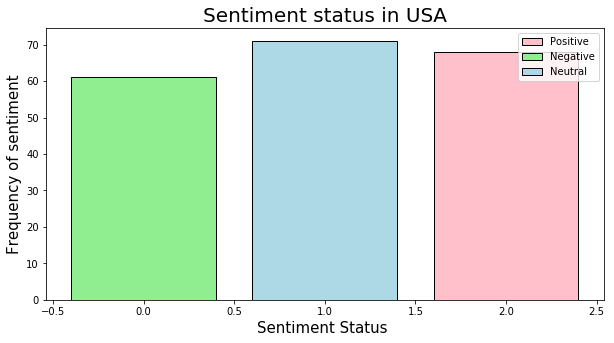

In [19]:
fig, ax = plt.subplots(figsize = (10,5))
index = range(4)
plt.bar(index[2], positive, color='pink', edgecolor = 'black', width = 0.8)
plt.bar(index[0], negative, color = 'lightgreen',edgecolor = 'black', width = 0.8)
plt.bar(index[1], neutral, color = 'lightblue',edgecolor = 'black', width = 0.8)
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.xlabel('Sentiment Status ',fontdict = {'size' : 15})
plt.ylabel('Frequency of sentiment', fontdict = {'size' : 15})
plt.title('Sentiment status in USA', fontsize = 20)
print "Positive Tweets: " + str(positive)
print "Negative Tweets: " + str(negative)
print "Neutral Tweets: " + str(neutral)

# World Sentiment on Donald Trump

Text(0.5,1,u'Word Frequency Graph of Tweets from World')

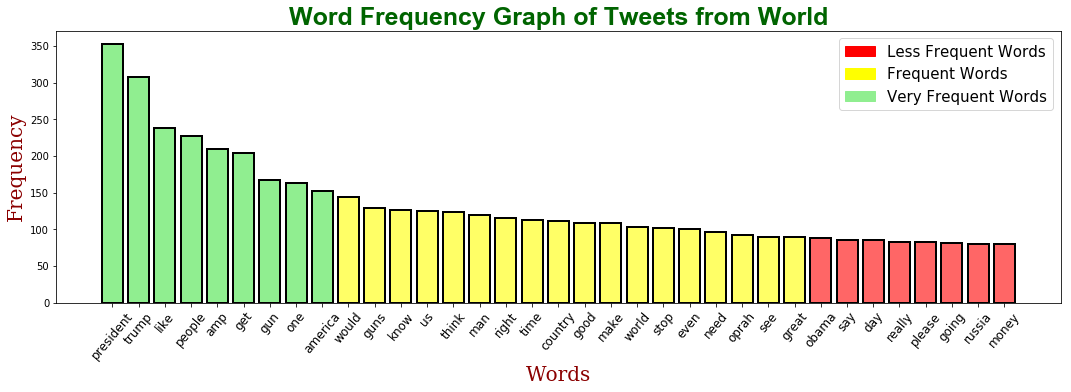

In [20]:
%matplotlib inline
labels, values = zip(*TextCounter.most_common(35))
fig, ax = plt.subplots(figsize = (18,5))

labels = np.array(labels)
values = np.array(values)

indexes = np.arange(len(labels))
s = ax.bar(indexes, values, facecolor=[1,1,0,0.6], edgecolor='black', width = 0.8, linewidth = 2)
ax.set_xticks(indexes)
twentyfive, seventyfive = np.percentile(values, [25,75])

for value, patch in zip(values,s.patches):
    if (value < twentyfive):
        patch.set_facecolor([1,0,0,0.6])
        patch.set_edgecolor('black')
    elif (value > seventyfive):
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('black')
    else:
        patch.set_edgecolor('black')

ax.set_xticklabels(labels)

plt.xticks(rotation = 50, fontsize = 12)
red_patch = mpatches.Patch(color='red', label='Less Frequent Words')
yellow_patch = mpatches.Patch(color='yellow', label='Frequent Words')
green_patch =  mpatches.Patch(color='lightgreen', label='Very Frequent Words')
plt.legend(handles=[red_patch, yellow_patch, green_patch], fontsize = 15)


font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

font_title = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 25,
        }
plt.xlabel('Words', fontdict = font)
plt.ylabel('Frequency', fontdict = font)
plt.title('Word Frequency Graph of Tweets from World', fontdict = font_title)

In [21]:
mask1 = df['sentimental_score'] < 0
mask2 = df['sentimental_score'] > 0
posData = df[mask2]['sentimental_score']
negData =df[mask1]['sentimental_score']

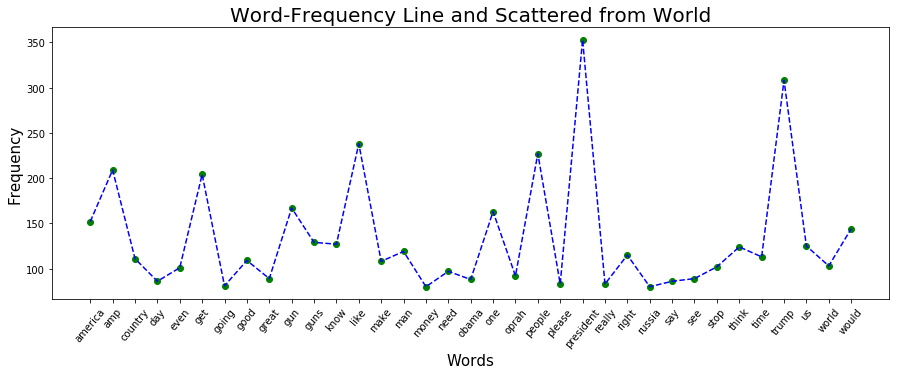

In [22]:
%matplotlib inline
word, count = zip(*sorted(TextCounter.most_common(35)))
plt.figure(figsize =(15,5))
plt.plot(word, count, 'go', word,count, 'b--')
plt.xticks(rotation = 50)
plt.xlabel('Words', fontdict = {'size': 15})
plt.ylabel('Frequency', fontdict = {'size': 15})
plt.title('Word-Frequency Line and Scattered from World', fontsize = 20)
print

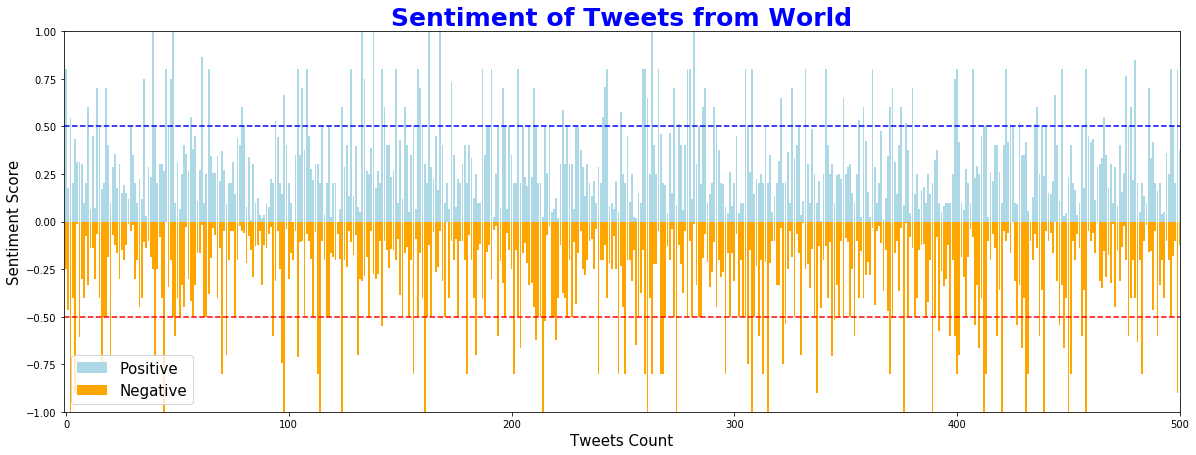

In [23]:
plt.figure(figsize = (20,7))
plt.bar(range(len(posData)), posData, color = 'lightblue')
plt.bar(range(len(negData)), negData, color = 'orange')
plt.xlabel('Tweets Count', fontsize = 15)
plt.legend(['Positive', 'Negative'], fontsize = 15)
plt.plot(range(-1,len(posData)), [0.5] * (len(posData)+1), 'b--')
plt.plot(range(-1,len(posData)), [-0.5] * (len(posData)+1), 'r--')
plt.xlim(-1, 500)
plt.ylim(-1,1)
plt.ylabel('Sentiment Score', fontsize = 15)
plt.title('Sentiment of Tweets from World', fontdict = {'size': 25, 'weight': 'bold', 'color' : 'blue'})
print 

In [24]:
positive = len(df[df['sentiment_status'] == 'very pos']) + len(df[df['sentiment_status'] == 'pos'])
negative = len(df[df['sentiment_status'] == 'very neg']) + len(df[df['sentiment_status'] == 'neg'])
neutral = len(df[df['sentiment_status'] == 'neu'])

Positive Tweets: 1145
Negative Tweets: 986
Neutral Tweets: 1177


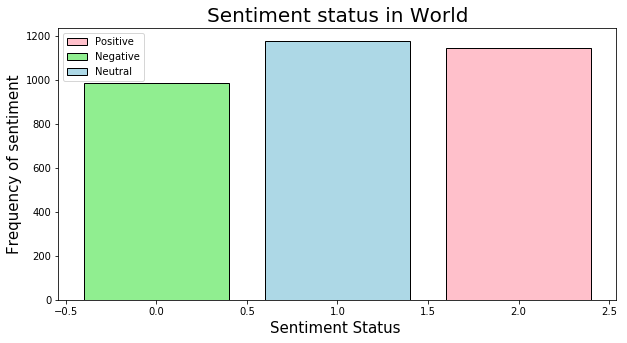

In [25]:
fig, ax = plt.subplots(figsize = (10,5))
index = range(4)
plt.bar(index[2], positive, color='pink', edgecolor = 'black', width = 0.8)
plt.bar(index[0], negative, color = 'lightgreen',edgecolor = 'black', width = 0.8)
plt.bar(index[1], neutral, color = 'lightblue',edgecolor = 'black', width = 0.8)
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.xlabel('Sentiment Status ',fontdict = {'size' : 15})
plt.ylabel('Frequency of sentiment', fontdict = {'size' : 15})
plt.title('Sentiment status in World', fontsize = 20)
print "Positive Tweets: " + str(positive)
print "Negative Tweets: " + str(negative)
print "Neutral Tweets: " + str(neutral)

In [26]:
df.head()

,Unnamed: 0,Unnamed: 0.1,full_text,is_retweet,place_cord,place_name,result_type,retweet_count,screen_name,tweet_created,tweet_id,user_id,sentimental_score,sentiment_status,subjectivity,latitude,longitude
0,0,0,Cornered rat,0,"[115.421372, 39.43277]",Beijing,recent,0,peterkalksma,Mon Feb 19 06:10:46 +0000 2018,9.650000e+17,1.504561e+07,0.000000,neu,0.0,39.905963,116.391248
1,1,1,Russian meddling had no effect except for help...,0,"[121.164993, 43.42833]",Heilongjiang,recent,0,MRW_real_one,Mon Feb 19 05:33:21 +0000 2018,9.650000e+17,8.410000e+17,-0.250000,neg,0.5,48.000005,127.999992
2,2,2,you fking psychopath Thank God amp that you re...,0,"[117.998322, 27.14303]",Zhejiang,recent,0,1st04Bravo,Sun Feb 18 16:44:25 +0000 2018,9.650000e+17,2.563797e+09,0.000000,neu,0.0,29.000000,120.000000
3,3,3,you fking psychopath Thank God amp for beating...,0,"[117.998322, 27.14303]",Zhejiang,recent,0,1st04Bravo,Sun Feb 18 16:41:22 +0000 2018,9.650000e+17,2.563797e+09,0.000000,neu,0.0,29.000000,120.000000
4,4,4,I m sorry but shouldn t your focus be on matte...,0,"[97.387161, 26.033886]",Sichuan,recent,0,Douglas_Hook,Sun Feb 18 15:25:21 +0000 2018,9.650000e+17,8.756158e+07,-0.466667,neg,1.0,30.500000,102.500000


In [27]:
len(df.columns)

17

In [28]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'full_text', u'is_retweet',
       u'place_cord', u'place_name', u'result_type', u'retweet_count',
       u'screen_name', u'tweet_created', u'tweet_id', u'user_id',
       u'sentimental_score', u'sentiment_status', u'subjectivity', u'latitude',
       u'longitude'],
      dtype='object')

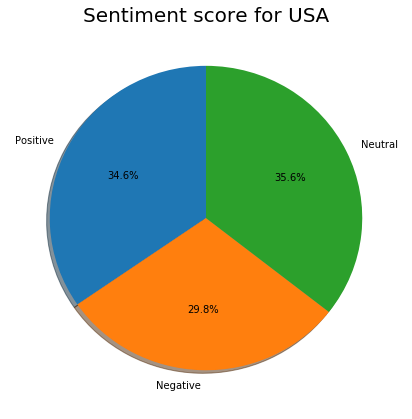

In [29]:
plt.figure(figsize = (7,7))
plt.pie([positive, negative, neutral],  autopct='%1.1f%%', labels= ['Positive', 'Negative', 'Neutral'], shadow=True, startangle=90)
plt.title('Sentiment score for USA', fontsize = 20)
print